# U.S. Medical Insurance Costs

Import The Dataset

In [94]:
import csv
import pandas as pd

insurance_data = pd.read_csv("insurance.csv")

In [95]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Inspect Data

In [96]:
df.info()
print("\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Calculate Average Age

In [97]:
print("Average age is: " + str(round(df.age.mean())))

Average age is: 39


Find Majority Region

In [98]:
print("Regions descending: \n" + str(df.region.value_counts()))

Regions descending: 
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Compare Costs Between Smokers and Non-Smokers

In [99]:
# get average charges for both groups
avg_charges = df.groupby("smoker")["charges"].mean()

# extract values
non_smoker_avg = avg_charges["no"]
smoker_avg = avg_charges["yes"]

# calculate ratio
times_less = smoker_avg / non_smoker_avg

# print result
print("Average costs of smokers and non-smokers compared: \n" + str(df.groupby("smoker")["charges"].mean()))
print("\n")
print("Non-smokers pay " + str(round(times_less)) + " times less than smokers on average.")

Average costs of smokers and non-smokers compared: 
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


Non-smokers pay 4 times less than smokers on average.


Average age of patients with at least one child

In [100]:
df[df["children"] >= 1]["age"].mean()

39.78010471204188

Plotting the age histogram

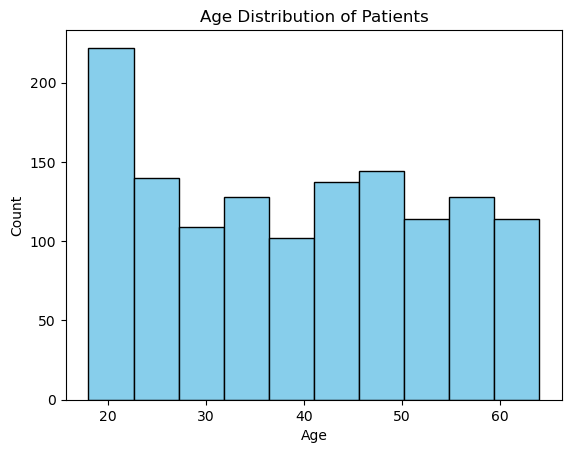

In [101]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Region bar chart

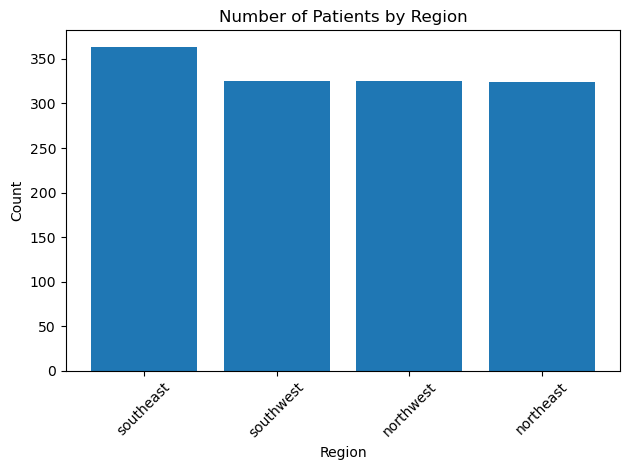

In [102]:
region_counts = df["region"].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.title("Number of Patients by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average age: with children vs without - bar chart

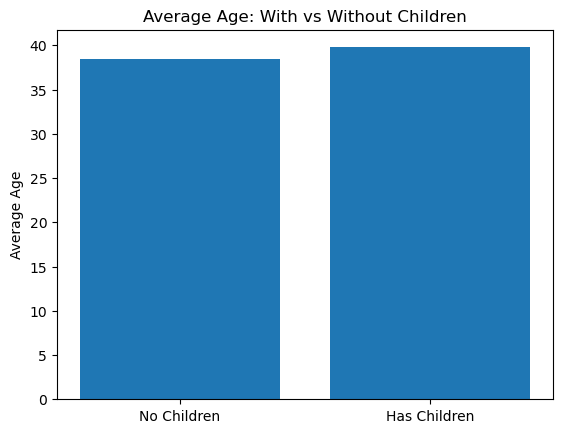

In [103]:
has_children = df["children"] > 0
age_means = df.groupby(has_children)["age"].mean()

labels = ["No Children", "Has Children"]
plt.bar(labels, age_means.values)
plt.title("Average Age: With vs Without Children")
plt.ylabel("Average Age")
plt.show()

Average charges: smokers vs non-smokers - bar chart

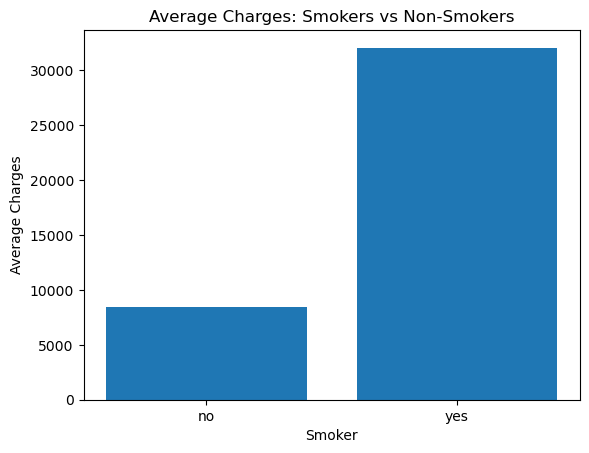

In [104]:
avg_charges = df.groupby("smoker")["charges"].mean()

plt.bar(avg_charges.index, avg_charges.values)
plt.title("Average Charges: Smokers vs Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()